## Resume Classification(Validation and testing)

In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
model1 = open(r'C:\Users\KIIT\Desktop\MSA project\Model/mlp_net.pkl','rb')
mlp_net = pickle.load(model1)

In [3]:
mlp_net

MLPClassifier(alpha=0.1, max_iter=1000)

In [4]:
model2 = open(r'C:\Users\KIIT\Desktop\MSA project\Model/gnb.pkl','rb')
gnb = pickle.load(model2)

In [5]:
gnb

GaussianNB()

In [6]:
df = pd.read_excel(r'C:\Users\KIIT\Desktop\MSA project/Validation_data_1.xls')

In [7]:
df

,Resume
0,"Soumayan Pal Currently, am a third year underg..."


In [8]:
#df['Resume'][3]

### Preprocessing the data

In [9]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['Cleaned_Resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [10]:
df

,Resume,Cleaned_Resume
0,"Soumayan Pal Currently, am a third year underg...",Soumayan Pal Currently am a third year undergr...


In [11]:
df.reset_index(inplace=True)

In [12]:
from transformers import GPT2Tokenizer,GPT2LMHeadModel

In [13]:
tokenizer=GPT2Tokenizer.from_pretrained('gpt2')
model=GPT2LMHeadModel.from_pretrained('gpt2')

In [14]:
summarised_resumes = []
for i in range(len(df['Cleaned_Resume'])):
    original_text = df['Cleaned_Resume'][i]
    inputs = tokenizer.batch_encode_plus([original_text],return_tensors='pt',max_length=1000)
    summary_ids = model.generate(inputs['input_ids'],early_stopping=True)
    summary_txt = tokenizer.decode(summary_ids[0],skip_special_tokens=True)
    summarised_resumes.append(summary_txt)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 682, but ``max_length`` is set to 20.This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


In [15]:
summarised_resumes

['Soumayan Pal Currently am a third year undergraduate 2019 batch in Computer Science and Communications branch at KIIT I am a Data Science enthusiast having experience in Machine learning Deep Learning OpenCV and NLP I have done the Google Cloud Ready Program in Google Cloud Platform and have basic cloud computing skills I have also done several open source contributions soumayan pal 8172017690 Durgapur India linkedin com in soumayan pal 69ba651b2 github com Soumayan pal01 EDUCATION Bachelor of Technology B Tech Kalinga Institute of Industrial Technology Bhubaneshwar 07 2019 Present GPA of 9 11 EXPERIENCE Technical Member Machine Learning Microsoft Learn Student Ambassadors KIIT 06 2021 Present Microsoft Learn Student Ambassadors affiliated to KIIT university through School of Computer Science Engineering Member Machine Learning Team Mozilla Club BBSR 02 2021 Present Bhubaneshwar Mozilla Campus Club KIIT Training Program Machine Learning Konnexions KIIT 10 2020 02 2021 Bhubaneshwar IT

In [16]:
df['Summarised_Resume'] = summarised_resumes

In [17]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

In [18]:
new_text1 = []
for i in range(len(df['Summarised_Resume'])):
    text1=re.sub('[^a-zA-Z]', ' ', df['Summarised_Resume'][i])
    new_text1.append(text1)

In [19]:
new_text2 = []
for i in range(len(new_text1)):
    text2=new_text1[i].strip()
    new_text2.append(text2)

In [20]:
new_text3 = []
for i in range(len(new_text2)):
    text3=new_text2[i].lower()
    new_text3.append(text3)

In [21]:
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    new_text4 = [stemmer.stem(t) for t in new_text3]

In [22]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

n=WordNetLemmatizer()
new_text5=[]
for i in range(len(new_text4)):
    words=word_tokenize(new_text4[i])
    lem_word=[]
    for w in words:
        lemm=n.lemmatize(w)
        lem_word.append(lemm)
    ps_tg=pos_tag(lem_word)
    new_text5.append(ps_tg)

In [24]:
new_text6=[]
for i in new_text5:
    a=[]
    for j in i:
        if (j[1]=='NN' or j[1]=='NNP' or j[1]=='NNS' or j[1]=='NNPS' or j[1]=='VB'or j[1]=='VBD'or j[1]=='VBG'or j[1]=='VBN'or j[1]=='VBP'or j[1]=='VBZ'or j[1]=='VH'or j[1]=='VHD'or j[1]=='VHG'or j[1]=='VHN'or j[1]=='VHP'or j[1]=='VHZ'or j[1]=='VV'or j[1]=='VVD'or j[1]=='VVG'or j[1]=='VVN'or j[1]=='VVP'or j[1]=='VVZ'or j[1]=='JJ'or j[1]=='JJR'or j[1]=='JJS'or j[1]=='RB'or j[1]=='RBR'or j[1]=='RBS'):
            a.append(j[0])
    new_text6.append(a)

In [25]:
#new_text6[3]

In [26]:
new_text7=[]
for i in new_text6 :
    lem_join=" ".join(i)
    new_text7.append(lem_join)

In [27]:
new_text7[0]

'soumayan pal currently am third year undergraduate batch computer science communication branch kiit i am data science enthusiast having experience machine learning deep learning opencv nlp i have done google cloud ready program google cloud platform have basic cloud computing skill i have also done several open source contribution soumayan pal durgapur india linkedin com soumayan pal ba b github com soumayan pal education bachelor technology b tech kalinga institute industrial technology bhubaneshwar present gpa experience technical member machine learning microsoft learn student ambassador present microsoft learn student ambassador affiliated kiit university school computer science engineering member machine learning team mozilla club bbsr present bhubaneshwar mozilla campus club kiit training program machine learning konnexions kiit society kiit computer vision iot intern spark foundation ce ifications google cloud ready program natural language processing specialization machine lea

In [28]:
df['Extracted_Text'] = new_text7

In [29]:
df

,index,Resume,Cleaned_Resume,Summarised_Resume,Extracted_Text
0,0,"Soumayan Pal Currently, am a third year underg...",Soumayan Pal Currently am a third year undergr...,Soumayan Pal Currently am a third year undergr...,soumayan pal currently am third year undergrad...


## Visualizations

In [30]:
from PIL import Image
img = np.array(Image.open(r"C:\Users\KIIT\Desktop\MSA project\Images/mask_img.png"))

In [31]:
corpus=" "

for i in range(0,len(df)):
    corpus= corpus+ df["Extracted_Text"][i]

In [32]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(corpus)

len(tokens)

386

In [33]:
words = []

for word in tokens:
    words.append(word.lower())

In [34]:
stopwords = nltk.corpus.stopwords.words('english')

new_words = []

for word in words:
    if word not in stopwords:
        new_words.append(word)

In [35]:
from nltk.stem import WordNetLemmatizer 
  
wn = WordNetLemmatizer() 

lem_words=[]

for word in new_words:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [36]:
freq_dist = nltk.FreqDist(lem_words)
common_words50 = freq_dist.most_common(50)

In [37]:
res=' '.join([i for i in lem_words if not i.isdigit()])

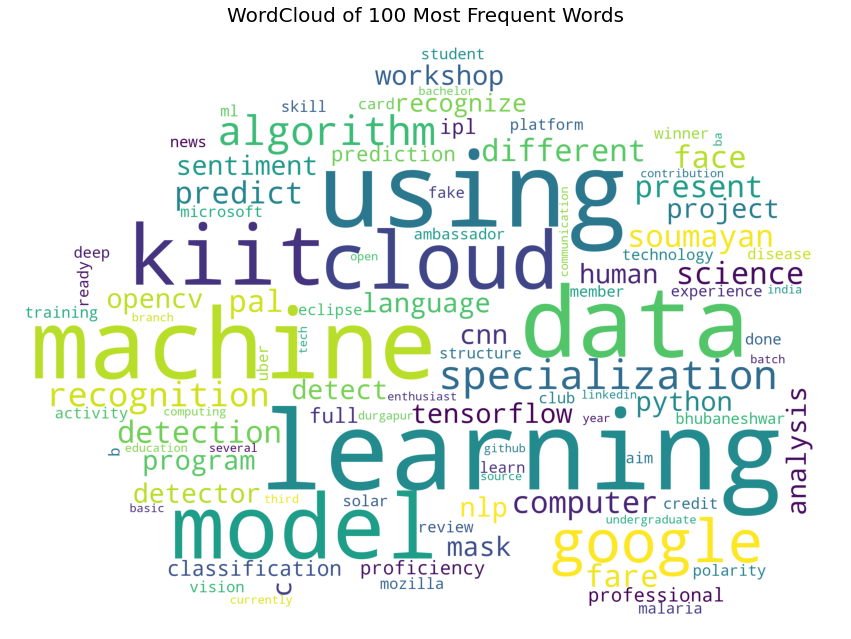

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(15,15))
wordcloud = WordCloud(mask = img,background_color='white',max_font_size=300,collocations=False,contour_width = 1,max_words = 100,contour_color = 'white',colormap = "viridis",width=700,height=500).generate(res)

plt.imshow(wordcloud)
plt.title('WordCloud of 100 Most Frequent Words',fontsize=20)
plt.axis('off')
plt.show()
wordcloud.to_file(r'C:\Users\KIIT\Documents\INNOVENTSOFT FILES\Twitter Sentiment Analysis\WordClouds/100 common WordCloud.png')

### Constructing Features using Vectorizers

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

test = df['Extracted_Text'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True, max_features=100, stop_words='english')

word_vectorizer.fit(test)
test_features = word_vectorizer.transform(test)

print ("Feature construction completed .....")

Feature construction completed .....


In [40]:
test_features.shape

(1, 100)

In [41]:
preds1 = mlp_net.predict(test_features.todense())

In [42]:
preds1

array(['DevOps Engineer'], dtype='<U25')

In [43]:
preds2 = gnb.predict(test_features.todense())

In [44]:
preds2

array(['Data Science'], dtype='<U25')

In [45]:
output = pd.DataFrame()

In [46]:
output['Resume'] = df['Resume']
output['Suggested profile1'] = preds2
output['Suggested profile2'] = preds1

In [47]:
output

,Resume,Suggested profile1,Suggested profile2
0,"Soumayan Pal Currently, am a third year underg...",Data Science,DevOps Engineer


In [51]:
output.to_csv(r'C:\Users\KIIT\Desktop\MSA project/outputs.csv',index=False)